In [132]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import pandas as pd 
import numpy as np
import matplotlib as plt

import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'figure', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [144]:
#Errors function provided by Dr. Bianco
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# Part 1: Create a line

In [134]:
#Create a line of 10 points, 0-100, with slope of 1 and y-intercept of zero.
np.random.seed(10)
x = np.linspace(0, 100, num = 10)
y = line(1,x,0,errors)
z = errors(x)

Text(0.5,1,'X vs Y')

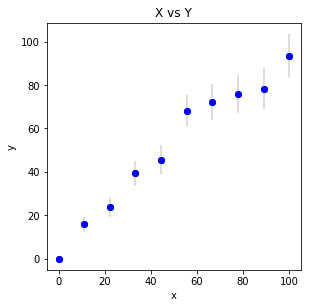

In [145]:
#Plot the data generated above with error bars
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
ax.scatter(x,y,color = 'b')
ax.errorbar(x = x, y = y, yerr= z, fmt='o', color='blue',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we see the data set produced from x and y. The slope here is around 1 and the y intercept is zero.

# Part Two: Use add_constant

In [136]:
#Add a constant
x_new = sm.add_constant(x)
print(x)
print(y)
print(x_new)

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
[ 0.         15.72188521 23.85438078 39.23683283 45.55651289 67.90399219
 72.11996249 75.749839   78.2393781  93.60037396]
[[  1.           0.        ]
 [  1.          11.11111111]
 [  1.          22.22222222]
 [  1.          33.33333333]
 [  1.          44.44444444]
 [  1.          55.55555556]
 [  1.          66.66666667]
 [  1.          77.77777778]
 [  1.          88.88888889]
 [  1.         100.        ]]


# Part Three: Use statsmodels.api.OLS to Fit x and y


In [95]:
#Fit the data to an OLS model
smresult = sm.OLS(y, x).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     781.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.66e-10
Time:                        15:35:08   Log-Likelihood:                -32.596
No. Observations:                  10   AIC:                             67.19
Df Residuals:                       9   BIC:                             67.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9897      0.035     27.953      0.000       0.910       1.070
==============================================================================
Omnibus:                        0.316   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.063
Skew:                          -0.122   Prob(JB):                        0.969
Kurtosis:                       2.695   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the OLS regression results between x and y. It is found that the R^2 is 0.987, which is close to the slope of zero. This could be attributed to error.

In [94]:
#Fit the data with the added constant to an OLS model
smresult = sm.OLS(y, x_new).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     225.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.79e-07
Time:                        15:34:58   Log-Likelihood:                -31.125
No. Observations:                  10   AIC:                             66.25
Df Residuals:                       8   BIC:                             66.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9120      3.574      1.654      0.137      -2.330      14.154
x1             0.9057      0.060     15.032      0.000       0.767       1.045
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.685
Skew:                           0.640   Prob(JB):                        0.710
Kurtosis:                       2.927   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the OLS regression results between the x+constant and y. While the R^2 is similar, the important information are the slope and y iontercept, labeled as under coef in the table.

# Part 4: Plot the Data (as points) and both statsmodels fits

Text(0.5,1,'X vs Y')

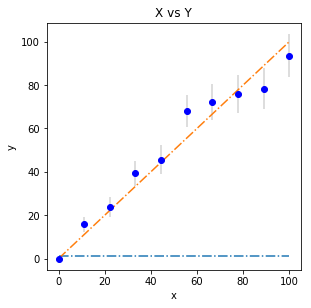

In [139]:
#Plot between x and y and ols statsmodel fit
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
pl.plot(x, x_new * 1 + 0, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(1,0))
ax.errorbar(x = x, y = y, yerr= z, fmt='o', color='blue',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we have the same dataset in the previous figure, but now have the OLS regression line on overlayed. 

Text(0.5,1,'X vs Y')

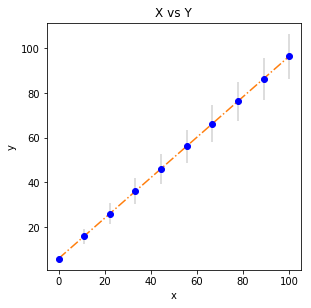

In [140]:
#Plot between new x and new y and ols statsmodel fit
new_y = 0.9057*x + 5.9120
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
pl.plot(x_new, x_new * 0.9057 + 5.9120, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(0.9057, 5.9120))
ax.errorbar(x = x, y = new_y, yerr= z, fmt='o', color='blue',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we have the x+constant and y data. What is interesting is that this data follows the OLS regression data, which makes sense, because the model is based on the x+constant data.

# Part 5: Create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [113]:
#Create a line of 10 points, 0-100, with slope of 0.6 and y-intercept of 75
np.random.seed(10)
x2 = np.linspace(0, 100, num = 10)
y2 = line(0.6,x,75,errors)
z2 = errors(x2)

Text(0.5,1,'X vs Y')

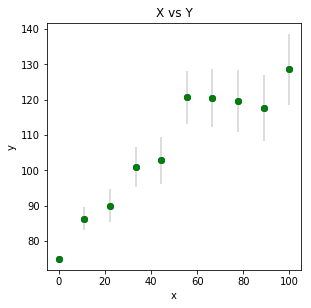

In [141]:
#Plot the data generated above with error bars
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
ax.scatter(x2,y2,color = 'b')
ax.errorbar(x = x2, y = y2, yerr= z2, fmt='o', color='green',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we see the data set produced from x and y. The slope here is around 0.6 and the y intercept is 75.

# Part 6: As part 3 but with Part 5 data

In [115]:
#Add a constant
x_new2 = sma.add_constant(x2)
print(x2)
print(y2)
print(x_new2)

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
[ 75.          86.27744077  89.96549189 100.9034995  102.77873511
 120.68176997 120.45329582 119.63872789 117.68382254 128.60037396]
[[  1.           0.        ]
 [  1.          11.11111111]
 [  1.          22.22222222]
 [  1.          33.33333333]
 [  1.          44.44444444]
 [  1.          55.55555556]
 [  1.          66.66666667]
 [  1.          77.77777778]
 [  1.          88.88888889]
 [  1.         100.        ]]


In [116]:
#Fit the data to an OLS model
smresult = sma.OLS(y2, x2).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     45.09
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.70e-05
Time:                        15:58:38   Log-Likelihood:                -52.002
No. Observations:                  10   AIC:                             106.0
Df Residuals:                       9   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6555      0.247      6.715      0.000       1.098       2.213
==============================================================================
Omnibus:                        1.081   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.719
Skew:                          -0.278   Prob(JB):                        0.698
Kurtosis:                       1.811   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the OLS regression results between x and y. It is found that the R^2 is 0.834, which is close to the slope of zero. This could be attributed to error.

In [117]:
#Fit the data with the added constant to an OLS model
smresult = sma.OLS(y2, x_new2).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     70.44
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.09e-05
Time:                        15:58:44   Log-Likelihood:                -31.125
No. Observations:                  10   AIC:                             66.25
Df Residuals:                       8   BIC:                             66.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9120      3.574     22.638      0.000      72.670      89.154
x1             0.5057      0.060      8.393      0.000       0.367       0.645
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.685
Skew:                           0.640   Prob(JB):                        0.710
Kurtosis:                       2.927   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the OLS regression results between the x+constant and y. While the R^2 is similar, the important information are the slope and y iontercept, labeled as under coef in the table.

# Part 7: Fit the Data with WLS

In [137]:
#Fit the data to an WLS model with defined weights
weights = 1/var(y2)
smresult = sma.WLS(y2, x2, weights=weights).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            WLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     45.09
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.70e-05
Time:                        17:50:24   Log-Likelihood:                -52.002
No. Observations:                  10   AIC:                             106.0
Df Residuals:                       9   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6555      0.247      6.715      0.000       1.098       2.213
==============================================================================
Omnibus:                        1.081   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.719
Skew:                          -0.278   Prob(JB):                        0.698
Kurtosis:                       1.811   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the WLS regression results between x and y. It is found that the R^2 is 0.834, which is close to the slope of zero. This could be attributed to error.

In [124]:
#Fit the data with the added constant to an WLS model with weights
smresult = sma.WLS(y2, x_new2, weights = weights).fit()
smresult.summary()

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            WLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     70.44
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.09e-05
Time:                        16:02:49   Log-Likelihood:                -31.125
No. Observations:                  10   AIC:                             66.25
Df Residuals:                       8   BIC:                             66.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9120      3.574     22.638      0.000      72.670      89.154
x1             0.5057      0.060      8.393      0.000       0.367       0.645
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.685
Skew:                           0.640   Prob(JB):                        0.710
Kurtosis:                       2.927   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above are the WLS regression results between x and y. The important information are the coefficients, which will be used for generating a line.

Text(0.5,1,'X vs Y')

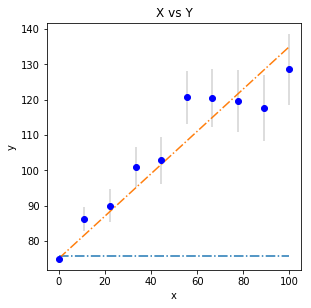

In [142]:
#Plot between x2 and y2 and wls statsmodel fit
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
pl.plot(x2, x_new2 * 0.6 + 75, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(1,0))
ax.errorbar(x = x2, y = y2, yerr= z2, fmt='o', color='blue',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we have the same dataset in the previous figure, but now have the WLS regression line on overlayed.

Text(0.5,1,'X vs Y')

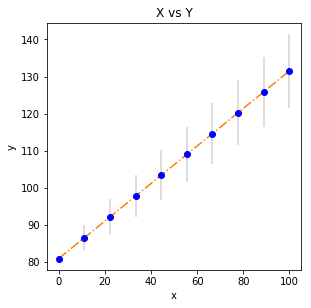

In [143]:
#Plot between x2 with added constants and y2 and wls statsmodel fit
new_y2 = 0.5057*x + 80.9120
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221)
pl.plot(x_new2, x_new2 * 0.5057 + 80.9120, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(0.5057, 80.9120))
ax.errorbar(x = x2, y = new_y2, yerr= z2, fmt='o', color='blue',
             ecolor='lightgray');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('X vs Y')

In the figure above, we have the x+constant and y data. What is interesting is that this data follows the WLS regression data, which makes sense, because the model is based on the x+constant data.